In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

diffs   = pd.read_pickle(r'D:\Projects\Pr\2695.40//selected_station_data_diffs.pkl')

In [2]:
# dataframe toont de verschillen tussen twee opeenvolgende tijdmomenten.
# eerste regel bevat NaN waarden omdat er voor deze regel geen verschil berekent kan worden met het tijdstip ervoor
# laatste kolom beval veel NaN waarden omdat er pas vanaf 2e helft 20e eeuw metingen zijn voor dit station.

In [3]:
diffs.head()

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
year,,,,,,,,,
1930.0416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930.1250,-327.0,-227.0,-273.0,-275.0,-326.0,-349.0,-408.0,-396.0,NaN
1930.2084,160.0,131.0,132.0,146.0,130.0,177.0,200.0,162.0,NaN
1930.2916,-4.0,18.0,14.0,24.0,-26.0,-59.0,-58.0,-59.0,NaN
1930.3750,45.0,21.0,36.0,40.0,35.0,82.0,77.0,65.0,NaN


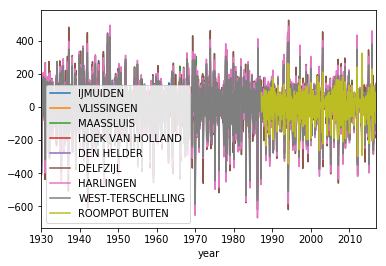

In [4]:
diffs.plot()

In [5]:
# in eerste stap de eerste regel plus laatste kolom niet meegenomen voor PCA analyse

In [6]:
diffs_noRB = diffs.iloc[:,0:-1]
X = diffs_noRB.as_matrix()[1::]

In [7]:
# allereerst bepalen we de eigen values en eigen vectors op basis van een covariance matrix

In [8]:
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.33473063 -0.22477348  0.1785941   0.24766366  0.05089627 -0.80799048
   0.27585955  0.11252383]
 [-0.26687248 -0.46789299 -0.05588241  0.60197365  0.0900804   0.49142709
   0.27211467 -0.14387025]
 [-0.30445894 -0.33504193 -0.49035397 -0.6099558  -0.09629838 -0.02355724
   0.29203289 -0.29571443]
 [-0.2985397  -0.36609583 -0.21474045 -0.04935016 -0.0569529   0.04230982
  -0.59188596  0.61068506]
 [-0.35893582 -0.05687639  0.33738434 -0.02447484  0.01890152 -0.0540985
  -0.57664901 -0.64629324]
 [-0.42102558  0.62523865 -0.54232015  0.3282665  -0.1386364  -0.05670928
  -0.06009622 -0.06242194]
 [-0.43201769  0.26141336  0.23211236 -0.26221378  0.71469542  0.20541132
   0.15760024  0.21111694]
 [-0.37706304  0.14757555  0.46540878 -0.15714623 -0.66814012  0.2344554
   0.23080174  0.20023649]]

Eigenvalues 
[  1.34888762e+05   2.91952312e+03   1.08660150e+03   3.86537873e+02
   2.68477861e+02   1.78785784e+02   1.19903946e+02   9.94150462e+01]


In [9]:
# een correlation matrix is een normalized covariance matrix. 
# waarbij $$R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$$
# met R als correlation matrix en C een covariance matrix
# Sinds we de input waarden niet 
# gestandardiseerd hebben is de output niet gelijk aan de covariance matrix

In [10]:
cor_mat1 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.35750999 -0.10869842  0.27165486 -0.02756398  0.15492243 -0.62063986
  -0.55307008 -0.26595831]
 [-0.3492986  -0.51523143  0.15866759 -0.6338333   0.0101695   0.25097096
   0.26676412 -0.22661437]
 [-0.3522206  -0.30262186 -0.57969803  0.50110015 -0.10611107  0.06572407
   0.07565581 -0.41941206]
 [-0.35529641 -0.33483996 -0.17492134  0.08789047  0.22822257  0.02059824
  -0.14190552  0.8066458 ]
 [-0.35794264  0.08295251  0.33739598  0.16115264 -0.82038284 -0.05785034
   0.11808315  0.18673896]
 [-0.34597287  0.56693163 -0.51680385 -0.48105839 -0.12619121  0.03813474
  -0.20624458  0.02173916]
 [-0.35527604  0.33285997  0.1074911   0.10947061  0.3814149  -0.3393649
   0.69177912  0.0155182 ]
 [-0.35474072  0.28272793  0.37670193  0.26324574  0.2795013   0.65353374
  -0.2490996  -0.12547247]]

Eigenvalues 
[  7.70309604e+00   1.71433872e-01   5.94227154e-02   2.76230545e-02
   5.77150661e-03   1.23846444e-02   1.13406860e-02   8.92748383e-03]


In [11]:
# de eigenvector bepalen alleen de richting van de nieuwe as, sinds ze allemaal een unit lengte hebben van 1, 
# zie Frobenius norm $$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$$

In [12]:
np.sum(np.abs(eig_vecs)**2, axis=0)**0.5

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [13]:
# vervolgens gaan we sorteren waarbij de eigenvectors met de hoogste waarde de meeste informatie 
# over de distributie van de data bezit.
# Note: de eigenvectors in eig_vecs zijn kolom vectors, dus neem de transponent.

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs.T[i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7.70309603732
0.171433871897
0.0594227154422
0.0276230544724
0.0123846444349
0.0113406859951
0.00892748383315
0.00577150660663


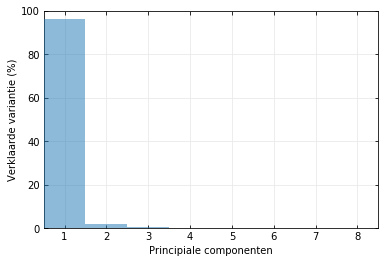

In [15]:
tot = np.ceil(sum(eig_vals)).astype(int)
var_exp = [(i[0] / tot)*100 for i in eig_pairs]
cum_var_exp = np.cumsum(var_exp)

x_ = np.arange(1,int(tot)+1,1)
plt.bar(x_,var_exp, width=1, alpha=0.5, zorder=10)#, log=True)

plt.xlim(0.5,tot+0.5)
plt.ylim(0,100)
plt.xlabel('Principiale componenten')
plt.ylabel('Verklaarde variantie (%)')
ax = plt.gca()
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.draw()
plt.grid(color='#E9E9E9', zorder=0)

In [32]:
# reduceer totale dataset tot 1 dimensie met behulp van eigenvector 
# behorende bij de hoogste eigenvalue
matrix_w = eig_pairs[0][1]
transformed = np.einsum('ij,j->i', X, matrix_w) # == X.dot(matrix_w)

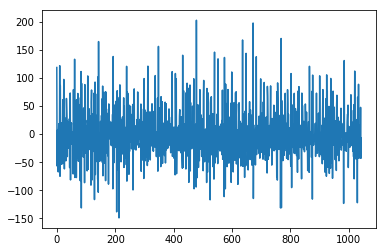

In [34]:
plt.plot(transformed / eig_pairs[0][0])

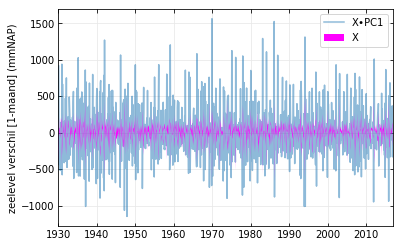

In [35]:
# de getransformeerde nieuwe parameter heeft een veel grotere spreiding dan de orginele waarden
# waarom?
Xmin = X.min(axis=1)
Xmax = X.max(axis=1)
plt.plot(diffs.index[1::],transformed, alpha=0.5, label='X∙PC1')
#plt.plot(diffs.index[1::],transformed / eig_pairs[0][0], alpha=0.5, label='X∙PC1')
#plt.plot(diffs.index[1::],X, color='magenta', alpha=0.05)
plt.fill_between(diffs.index[1::],Xmin,Xmax, zorder=20, facecolor='magenta', label='X')

plt.xlim(1930,2017)
plt.legend()
#plt.ylim(0,100)
#plt.xlabel('Principiale componenten')
plt.ylabel('zeelevel verschil [1-maand] (mmNAP)')
ax = plt.gca()
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.draw()
plt.grid(color='#E9E9E9', zorder=0)

In [36]:
from statsmodels.multivariate.pca import PCA

In [52]:
dif2 = diffs.iloc[1::]
dif2 = dif2.ix[:,0:-1]

In [53]:
pca = PCA(dif2)

In [57]:
pca.project(ncomp=None)

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING
year,,,,,,,,
1930.1250,-327.0,-227.0,-273.0,-2.750000e+02,-326.0,-349.0,-408.0,-396.0
1930.2084,160.0,131.0,132.0,1.460000e+02,130.0,177.0,200.0,162.0
1930.2916,-4.0,18.0,14.0,2.400000e+01,-26.0,-59.0,-58.0,-59.0
1930.3750,45.0,21.0,36.0,4.000000e+01,35.0,82.0,77.0,65.0
1930.4584,-17.0,-26.0,-37.0,-1.200000e+01,-7.0,-12.0,-18.0,6.0
1930.5416,185.0,178.0,183.0,1.780000e+02,180.0,172.0,208.0,182.0
1930.6250,-22.0,-28.0,-15.0,-3.400000e+01,-12.0,18.0,9.0,-12.0
1930.7084,-41.0,-15.0,-50.0,-4.600000e+01,-30.0,-78.0,-80.0,-58.0
1930.7916,151.0,71.0,180.0,1.500000e+02,164.0,199.0,176.0,172.0


In [58]:
diffs

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
year,,,,,,,,,
1930.0416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930.1250,-327.0,-227.0,-273.0,-275.0,-326.0,-349.0,-408.0,-396.0,NaN
1930.2084,160.0,131.0,132.0,146.0,130.0,177.0,200.0,162.0,NaN
1930.2916,-4.0,18.0,14.0,24.0,-26.0,-59.0,-58.0,-59.0,NaN
1930.3750,45.0,21.0,36.0,40.0,35.0,82.0,77.0,65.0,NaN
1930.4584,-17.0,-26.0,-37.0,-12.0,-7.0,-12.0,-18.0,6.0,NaN
1930.5416,185.0,178.0,183.0,178.0,180.0,172.0,208.0,182.0,NaN
1930.6250,-22.0,-28.0,-15.0,-34.0,-12.0,18.0,9.0,-12.0,NaN
1930.7084,-41.0,-15.0,-50.0,-46.0,-30.0,-78.0,-80.0,-58.0,NaN


In [23]:
abs1930 = pd.read_pickle(r'D:\Projects\Pr\2695.40//selected_station_data_1930.pkl')
pca = PCA(abs1930.fillna(abs1930.mean()))
abs1930_transformed = pca.project(ncomp=1)

In [24]:
abs1930.head()

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
year,,,,,,,,,
1930.0416,-64.0,-128.0,35.0,-61.0,-17.0,13.0,57.0,33.0,NaN
1930.1250,-391.0,-355.0,-238.0,-336.0,-343.0,-336.0,-351.0,-363.0,NaN
1930.2084,-231.0,-224.0,-106.0,-190.0,-213.0,-159.0,-151.0,-201.0,NaN
1930.2916,-235.0,-206.0,-92.0,-166.0,-239.0,-218.0,-209.0,-260.0,NaN
1930.3750,-190.0,-185.0,-56.0,-126.0,-204.0,-136.0,-132.0,-195.0,NaN


In [25]:
abs1930_transformed.head()

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
year,,,,,,,,,
1930.0416,-44.570755,-75.312459,68.728302,-10.432679,-65.591654,21.372211,4.149363,-55.964983,-33.854121
1930.1250,-352.812159,-324.335967,-208.373084,-300.626443,-383.346026,-331.150085,-349.012219,-375.821253,-106.489816
1930.2084,-204.294855,-204.351112,-74.859707,-160.804878,-230.245170,-161.297299,-178.851412,-221.707658,-71.492384
1930.2916,-219.331528,-216.499011,-88.377304,-174.961149,-245.745907,-178.494089,-196.079388,-237.310930,-75.035708
1930.3750,-172.631468,-178.770748,-46.395107,-130.995394,-197.604586,-125.085261,-142.573704,-188.851161,-64.031050


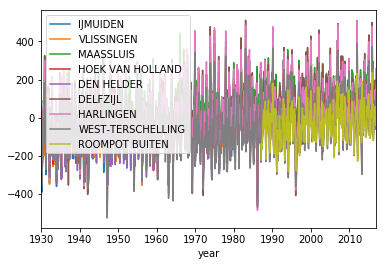

In [26]:
abs1930.plot()

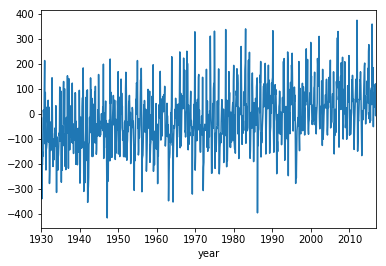

In [27]:
abs1930.mean(axis=1).plot()

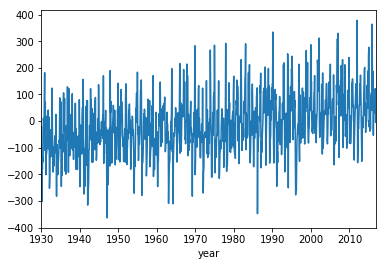

In [28]:
abs1930_transformed.mean(axis=1).plot()

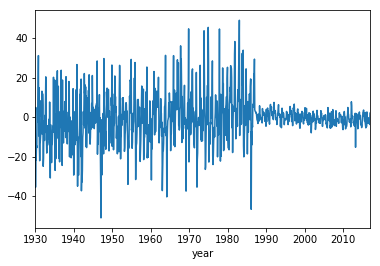

In [29]:
(abs1930.mean(axis=1)-abs1930_transformed.mean(axis=1)).plot()

In [402]:
def PCA(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    import numpy as NP
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = NP.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = NP.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return NP.dot(evecs.T, data.T).T, evals, evecs

In [403]:
PCA(X,1)

(array([[ 925.18558789],
        [-440.56178453],
        [  66.98614952],
        ..., 
        [ 375.45650567],
        [-335.94755893],
        [ -71.00508076]]),
 array([  1.34888762e+05,   2.91952312e+03,   1.08660150e+03,
          3.86537873e+02,   2.68477861e+02,   1.78785784e+02,
          1.19903946e+02,   9.94150462e+01]),
 array([[-0.33473063],
        [-0.26687248],
        [-0.30445894],
        [-0.2985397 ],
        [-0.35893582],
        [-0.42102558],
        [-0.43201769],
        [-0.37706304]]))

In [404]:
X

array([[-327.15627996, -227.14381592, -273.12368169, ..., -349.23489933,
        -408.1198466 , -396.0949185 ],
       [ 159.84372004,  130.85618408,  131.87631831, ...,  176.76510067,
         199.8801534 ,  161.9050815 ],
       [  -4.15627996,   17.85618408,   13.87631831, ...,  -59.23489933,
         -58.1198466 ,  -59.0949185 ],
       ..., 
       [-118.15627996,  -94.14381592, -105.12368169, ..., -186.23489933,
        -164.1198466 , -142.0949185 ],
       [  99.84372004,   88.85618408,  113.87631831, ...,  142.76510067,
         139.8801534 ,  135.9050815 ],
       [   7.84372004,  -45.14381592,  -33.12368169, ...,  105.76510067,
          58.8801534 ,   46.9050815 ]])

In [319]:
PC1.shape

In [323]:
np.einsum('ij,ik-', X, PC1)

array([ 912.92306717, -437.61905592,   52.93908322, ...,  366.33911551,
       -332.56874948,  -51.32351298])

In [294]:
np.einsum('ij,j', PC1, X)# == np.dot(b, a)

ValueError: operand has more dimensions than subscripts given in einstein sum, but no '...' ellipsis provided to broadcast the extra dimensions.

In [328]:
matrix_w = np.hstack((eig_pairs[0][1][None].T, eig_pairs[1][1][None].T))

In [332]:
matrix_w.T.dot(X.T)

array([[ 912.92306717, -437.61905592,   52.93908322, ...,  366.33911551,
        -332.56874948,  -51.32351298],
       [-145.4701088 ,   49.78485858,  -92.70479464, ...,  -84.28614595,
          50.45005338,  136.10067409]])

In [267]:
YPC1_2 = X.dot(matrix_w)

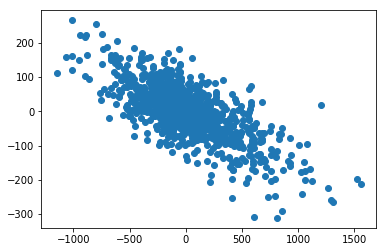

In [269]:
plt.scatter(YPC1_2[:,0],YPC1_2[:,1])

In [ ]:
matrix_w_PC1 = np.hstack((eig_pairs[0][1].reshape(9,1)))
matrix_w_PC2 = np.hstack((eig_pairs[1][1].reshape(9,1)))

In [181]:
Xmu  = X.mean(axis=0)
Xrho = X.std(axis=0)
Xstd = (X-Xmu)/Xrho

In [182]:
Xstd = (X-Xmu)/Xrho

In [154]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [176]:
Xmean = X - Xmu[None]

In [179]:
Xmean[:,0]

(1043,)

In [219]:
ax1 = 4
ax2 = 7
ax3 = 6

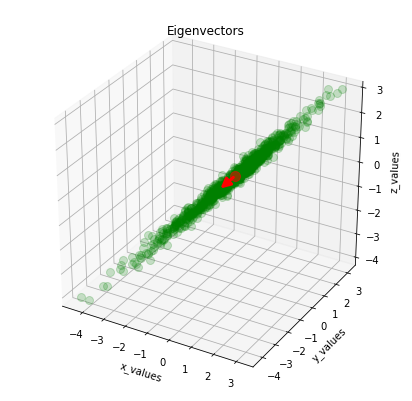

In [222]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(Xstd[:,ax1], Xstd[:,ax2], Xstd[:,ax3], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([Xmu[ax1]], [Xmu[ax2]], [Xmu[ax3]], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vecs.T[0:1]:
    a = Arrow3D([Xmu[ax1], v[ax1]], [Xmu[ax2], v[ax2]], [Xmu[ax3], v[ax3]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r", zorder=10)
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')

plt.show()

In [119]:
projected_data = np.dot(X, eig_vecs.T)
sigma = projected_data.std(axis=0).mean()

In [236]:
sigma

95.814060100027419

In [240]:
[Xmu[ax1],Xmu[ax2]] + sigma * np.array([axis[ax1],axis[ax2]])

array([ 62.02177417, -19.09055225])

[-0.33473063 -0.22477348  0.1785941   0.24766366  0.05089627 -0.80799048
 -0.27585955 -0.11252383] 95.8140601 [ -1.25009197e-15   9.60561129e-16   5.10936771e-16   9.46936148e-16
  -1.33524809e-15   1.79849743e-15   1.08999844e-15  -5.44999222e-16] [-32.07190057 -21.53645972  17.11182565  23.72966094   4.87657869
 -77.41684823 -26.43122357 -10.78136514]
[0.097794822627037398, 0.094918504314477473] [  4.97437352 -10.68644663]
[-0.26687248 -0.46789299 -0.05588241  0.60197365  0.0900804   0.49142709
 -0.27211467  0.14387025] 95.8140601 [ -1.25009197e-15   9.60561129e-16   5.10936771e-16   9.46936148e-16
  -1.33524809e-15   1.79849743e-15   1.08999844e-15  -5.44999222e-16] [-25.57013557 -44.8307267   -5.35432068  57.67753964   8.63096931
  47.08562513 -26.07241159  13.78479318]
[0.097794822627037398, 0.094918504314477473] [  8.72876413  13.87971168]
[-0.30445894 -0.33504193 -0.49035397 -0.6099558  -0.09629838 -0.02355724
 -0.29203289  0.29571443] 95.8140601 [ -1.25009197e-15   9.60561129e-

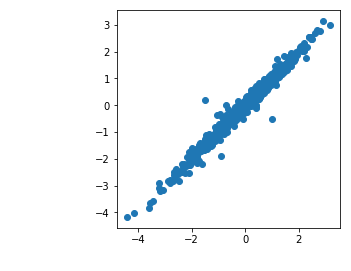

In [241]:
mu = data.mean(axis=0)
data = data - mu
# data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=1).mean()
#print(eigenvectors)

fig, ax = plt.subplots()
ax.scatter(Xstd[:,ax1], Xstd[:,ax2])
for axis in eigenvectors:
    print (axis, sigma, mu, sigma * axis)
    start, end = [Xmu[ax1],Xmu[ax2]], [Xmu[ax1],Xmu[ax2]] + sigma * np.array([axis[ax1],axis[ax2]])
    print (start,end)
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()